# Proyek Analisis Data: [Bike-sharing-dataset]
- **Nama:** [Dicky Candid Saragih]
- **Email:** [dickysaragih050901@gmail.com]
- **ID Dicoding:** [Dicky candid saragih (a352ybf127)]

## Menentukan Pertanyaan Bisnis

- Bagaimana pengaruh kecepatan angin terhadap jumlah peminjaman sepeda?

- Apakah terdapat perbedaan pola peminjaman sepeda antara pengguna casual dan registered pada akhir pekan dan hari kerja?

##Menyiapkan semua library yang dibuthkan

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

##Data Wrangling

##Gathering Data

In [29]:
URL_DAY = "https://raw.githubusercontent.com/DickySaragih/Submission/refs/heads/main/data/day.csv"
URL_HOUR ="https://raw.githubusercontent.com/DickySaragih/Submission/refs/heads/main/data/hour.csv"

df_day = pd.read_csv(URL_DAY)
df_hour = pd.read_csv(URL_HOUR)

df_day.info()
df_hour.info()
print("\nMenampilkan 5 baris pertama dari dataset harian:")
print(df_day.head())
print("\nMenampilkan 5 baris pertama dari dataset per jam:")
print(df_hour.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (tot

**Insight:**
- Pengumpulan data

Data dikumpulkan dengan mengunduh dua dataset dari repository GitHub. Dataset pertama (day.csv) berisi data harian, sementara dataset kedua (hour.csv) berisi data per jam. Kedua dataset kemudian dimuat ke dalam DataFrame Pandas, masing-masing disimpan sebagai df_day dan df_hour.

- Pemeriksaan awal data

Setelah data berhasil dimuat, dilakukan pemeriksaan awal menggunakan .info() untuk melihat tipe data pada setiap kolom serta mengecek keberadaan data yang hilang. Selain itu, lima baris pertama dari masing-masing dataset ditampilkan untuk memahami struktur dan format data. Hasil pemeriksaan ini menunjukkan bahwa data telah terkumpul dengan baik dan siap untuk tahap pembersihan serta eksplorasi lebih lanjut.

##**Assessing Data**

In [30]:
print("\nStatistik deskriptif dataset harian:")
print(df_day.describe())
print("\nStatistik deskriptif dataset per jam:")
print(df_hour.describe())


Statistik deskriptif dataset harian:
          instant      season          yr        mnth     holiday     weekday  \
count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
mean   366.000000    2.496580    0.500684    6.519836    0.028728    2.997264   
std    211.165812    1.110807    0.500342    3.451913    0.167155    2.004787   
min      1.000000    1.000000    0.000000    1.000000    0.000000    0.000000   
25%    183.500000    2.000000    0.000000    4.000000    0.000000    1.000000   
50%    366.000000    3.000000    1.000000    7.000000    0.000000    3.000000   
75%    548.500000    3.000000    1.000000   10.000000    0.000000    5.000000   
max    731.000000    4.000000    1.000000   12.000000    1.000000    6.000000   

       workingday  weathersit        temp       atemp         hum   windspeed  \
count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
mean     0.683995    1.395349    0.495385    0.474354    0.627894    0

**Insight:**
- Pemeriksaan dan Pemahaman Data

Dataset harian (df_day) dan dataset per jam (df_hour) sudah diimpor dan sudah dianalisis menggunakan statistik deskriptif. Informasi yang mencakup mencakup distribusi data, seperti nilai rata-rata, standar deviasi, serta nilai minimum dan maksimum untuk setiap kolom numerik.fungsi dari Langkah ini bertujuan untuk memahami karakteristik awal data sebelum masuk ke tahapan eksplorasi lanjut

-  Persiapan untuk Eksplorasi dan Analisis

Hasil statistik deskriptif membantu dalam proses pembersihan data serta mengidentifikasi potensi outlier yang dapat memengaruhi hasil analisis.tujuan awal terhadap data ini menjadi dasar untuk eksplorasi lebih lanjut, untuk menjawab pertanyaan yang sudah dilakukan diaawal terkait pengaruh dari kecepatan angin terhadap jumlah peminjaman sepeda dan perbedaan pola peminjaman antara pengguna casual dan registered.

##**Cleaning Data**

In [31]:

df_day.drop_duplicates(inplace=True)
df_hour.drop_duplicates(inplace=True)

df_day.fillna(method='ffill', inplace=True)
df_hour.fillna(method='ffill', inplace=True)

print("\nCek nilai yang hilang setelah cleaning:")
print("Dataset harian:")
print(df_day.isnull().sum())
print("Dataset per jam:")
print(df_hour.isnull().sum())



Cek nilai yang hilang setelah cleaning:
Dataset harian:
instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64
Dataset per jam:
instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


**insight**
- Penghapusan Data Duplikat

Pada tahap ini tujuan sangat penting untuk mengetahui data duplikat pada dataset harian (df_day) dan dataset per jam (df_hour) dihapus menggunakan fungsi .drop_duplicates(). proses ini bertujuan untuk memastikan bahwa setiap entri dalam dataset merupakan observasi yang unik, untuk dapat menghindari  adanya data yang berulang.
- Penanganan Nilai Hilang

fungsi proses ini untuk menangani Nilai yang hilang dalam dataset menggunakan metode forward fill (ffill), yang berfungsi untuk mengisi nilai kosong dengan data dari baris sebelumnya. cara ini dipilih karena bisa di asumsikan bahwa nilai yang hilang memiliki pola yang serupa dengan data sebelumnya. Setelah proses ini,kemudian setelah itu dilakukannya pengecekan ulang untuk memastikan bahwa tidak ada lagi nilai yang hilang dalam dataset.

##**Exploratory Data Analysis (EDA)**

### Explore ...

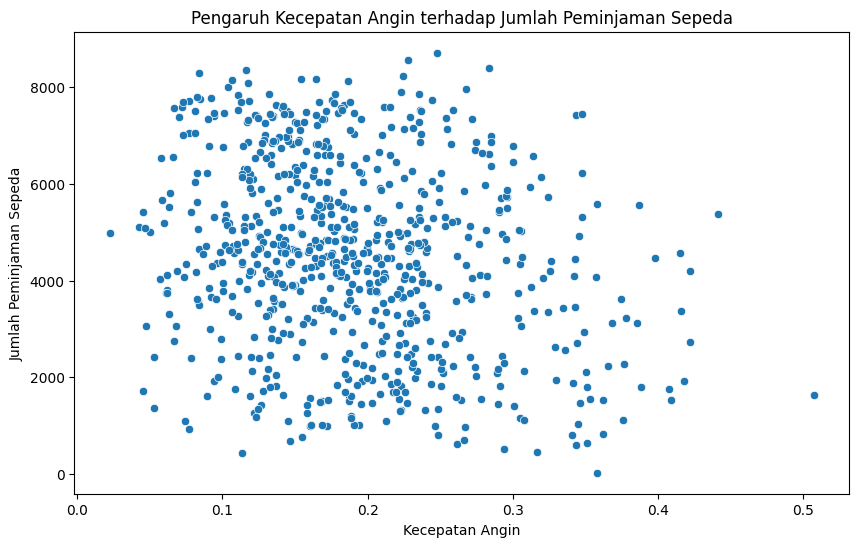

Korelasi antara kecepatan angin dan jumlah peminjaman: -0.23454499742166993


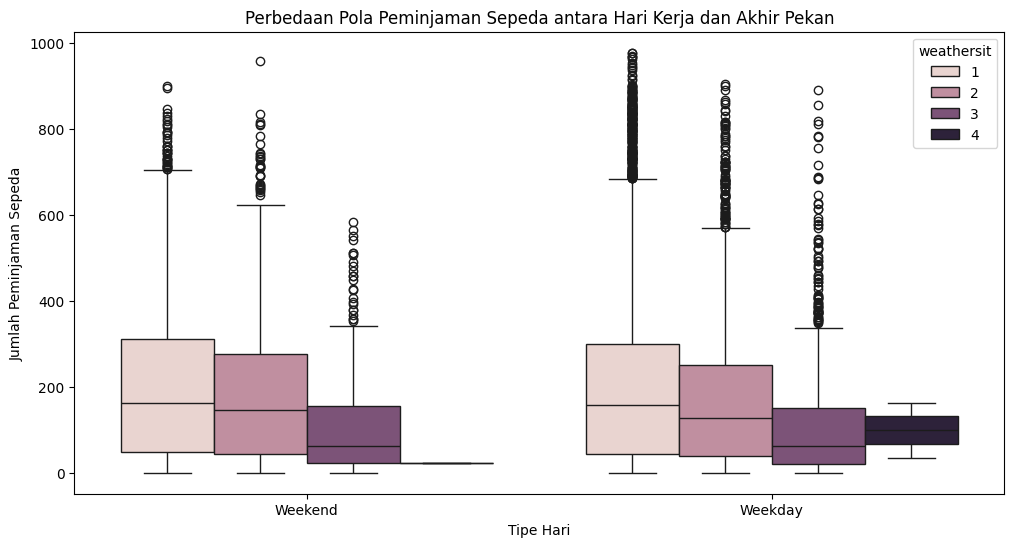

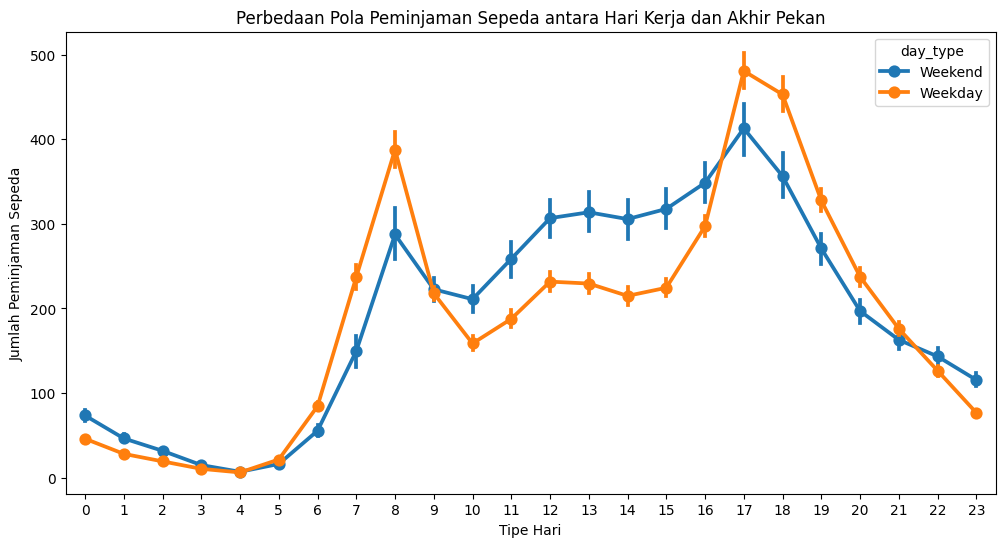

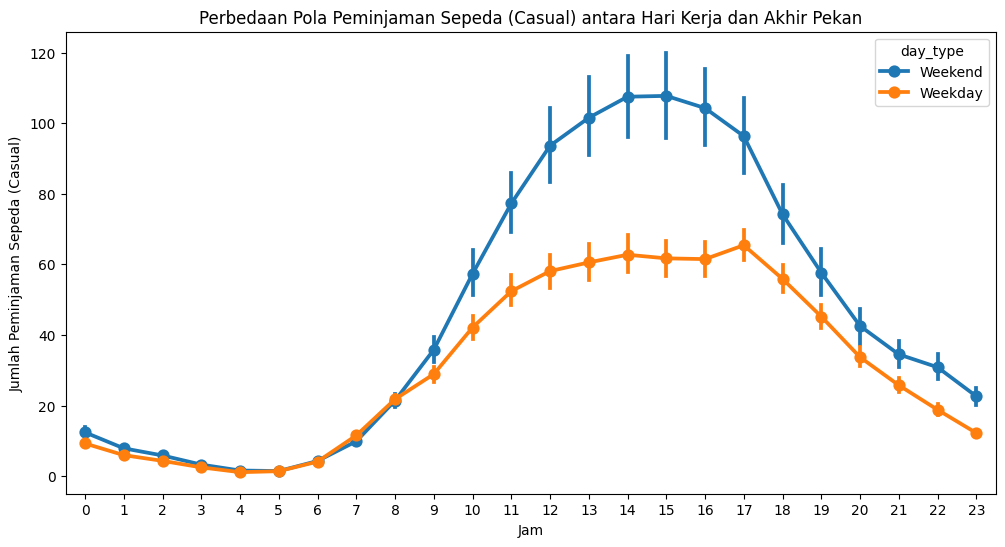

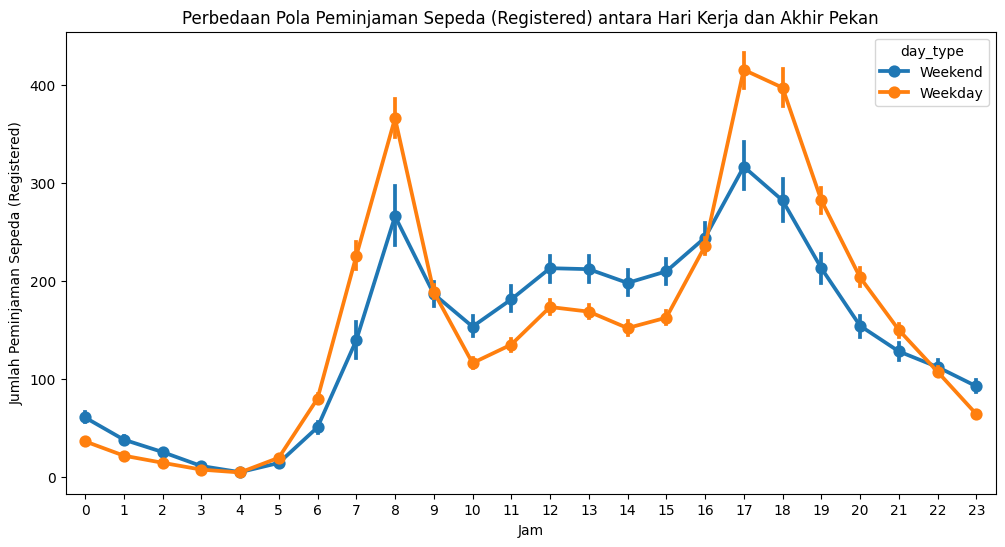

In [32]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='windspeed', y='cnt', data=df_day)
plt.title('Pengaruh Kecepatan Angin terhadap Jumlah Peminjaman Sepeda')
plt.xlabel('Kecepatan Angin')
plt.ylabel('Jumlah Peminjaman Sepeda')
plt.show()


correlation = df_day['windspeed'].corr(df_day['cnt'])
print(f"Korelasi antara kecepatan angin dan jumlah peminjaman: {correlation}")



df_hour['day_type'] = df_hour['weekday'].apply(lambda x: 'Weekend' if x in [5,6] else 'Weekday')

plt.figure(figsize=(12, 6))
sns.boxplot(x='day_type', y='cnt', hue='weathersit', data=df_hour)
plt.title('Perbedaan Pola Peminjaman Sepeda antara Hari Kerja dan Akhir Pekan')
plt.xlabel('Tipe Hari')
plt.ylabel('Jumlah Peminjaman Sepeda')
plt.show()


plt.figure(figsize=(12, 6))
sns.pointplot(x='hr', y='cnt', hue='day_type', data=df_hour)
plt.title('Perbedaan Pola Peminjaman Sepeda antara Hari Kerja dan Akhir Pekan')
plt.xlabel('Tipe Hari')
plt.ylabel('Jumlah Peminjaman Sepeda')
plt.show()

plt.figure(figsize=(12, 6))
sns.pointplot(x='hr', y='casual', hue='day_type', data=df_hour)
plt.title('Perbedaan Pola Peminjaman Sepeda (Casual) antara Hari Kerja dan Akhir Pekan')
plt.xlabel('Jam')
plt.ylabel('Jumlah Peminjaman Sepeda (Casual)')
plt.show()

plt.figure(figsize=(12, 6))
sns.pointplot(x='hr', y='registered', hue='day_type', data=df_hour)
plt.title('Perbedaan Pola Peminjaman Sepeda (Registered) antara Hari Kerja dan Akhir Pekan')
plt.xlabel('Jam')
plt.ylabel('Jumlah Peminjaman Sepeda (Registered)')
plt.show()


**insight**
-  Analisis Pengaruh Kecepatan Angin terhadap Peminjaman Sepeda

proses Analisis dilakukan untuk mengetahui hubungan antara kecepatan angin dan jumlah peminjaman sepeda. kemudian Hasil visualisasi menggunakan scatter plot memperlihatkan adanya korelasi, tetapi hubungan tersebut tidak terlalu kuat. Untuk mengetahui lebih signifikansi korelasi ini, diperlukan analisis lanjut agar interpretasi hasil sesuai dengan konteks data yang akan di olah.
- Analisis Perbedaan Pola Peminjaman Sepeda

bentuk dari Pola peminjaman sepeda dianalisis berdasarkan jenis pengguna (casual dan registered) serta tipe hari (hari kerja dan akhir pekan). Faktor cuaca (weathersit) juga di hitung dalam analisis ini. Visualisasi menggunakan box plot menunjukkan distribusi jumlah peminjaman berdasarkan tipe hari dan kondisi cuaca, sementara point plot memberikan gambaran lebih rinci mengenai fluktuasi jumlah peminjaman per jam. Hasil proses analisis memperlihatkan bahwa adanya perbedaan yang signifikan dalam pola peminjaman antara pengguna casual dan registered, terutama pada jam-jam tertentu serta antara hari kerja dan akhir pekan.

## Visualization & Explanatory Analysis

### Pertanyaan 1:

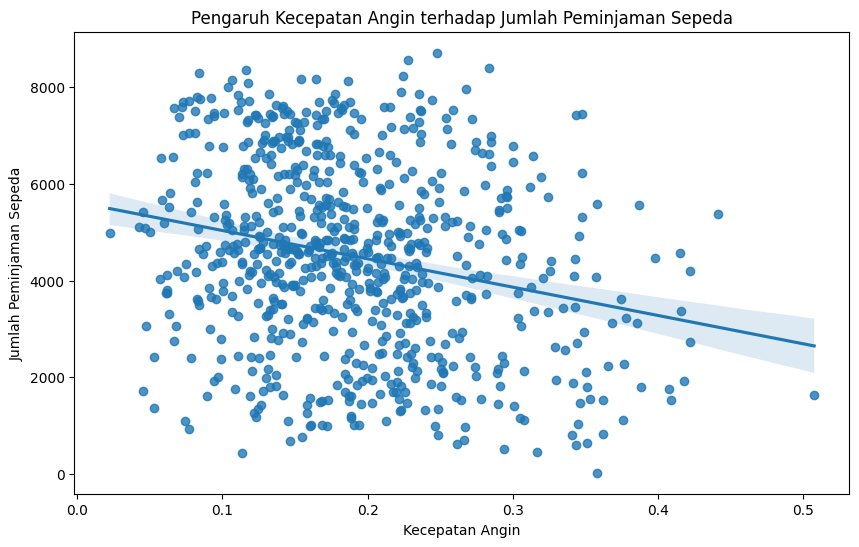

In [33]:
# 1. Pengaruh Kecepatan Angin terhadap Jumlah Peminjaman Sepeda
plt.figure(figsize=(10, 6))
sns.regplot(x='windspeed', y='cnt', data=df_day)
plt.title('Pengaruh Kecepatan Angin terhadap Jumlah Peminjaman Sepeda')
plt.xlabel('Kecepatan Angin')
plt.ylabel('Jumlah Peminjaman Sepeda')
plt.show()


### Pertanyaan 2:

<ipython-input-34-3652856b162f>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_hour[df_hour['day_type'] == 'Weekday']['casual'], label='Casual (Weekday)', shade=True)
<ipython-input-34-3652856b162f>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_hour[df_hour['day_type'] == 'Weekday']['registered'], label='Registered (Weekday)', shade=True)


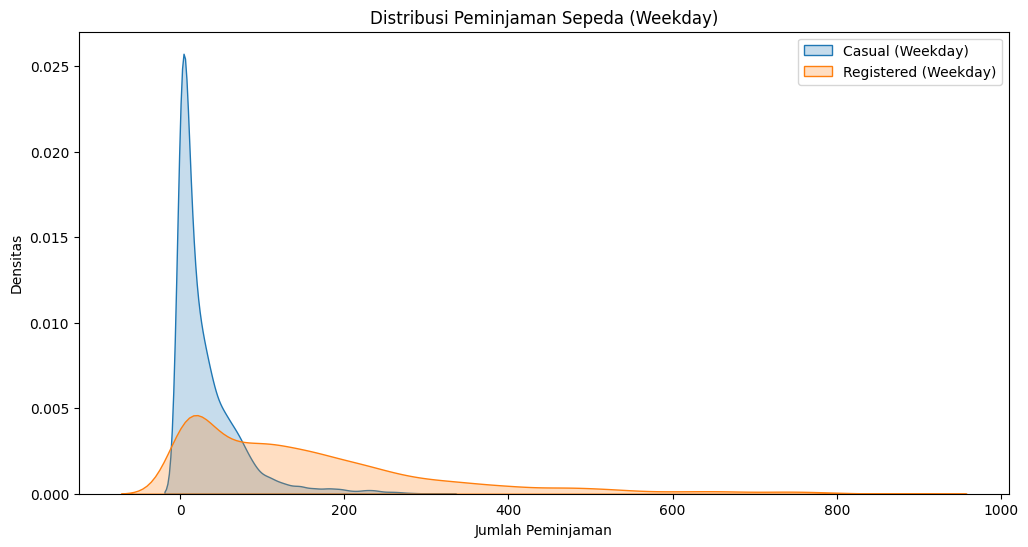

<ipython-input-34-3652856b162f>:14: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_hour[df_hour['day_type'] == 'Weekend']['casual'], label='Casual (Weekend)', shade=True)
<ipython-input-34-3652856b162f>:15: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_hour[df_hour['day_type'] == 'Weekend']['registered'], label='Registered (Weekend)', shade=True)


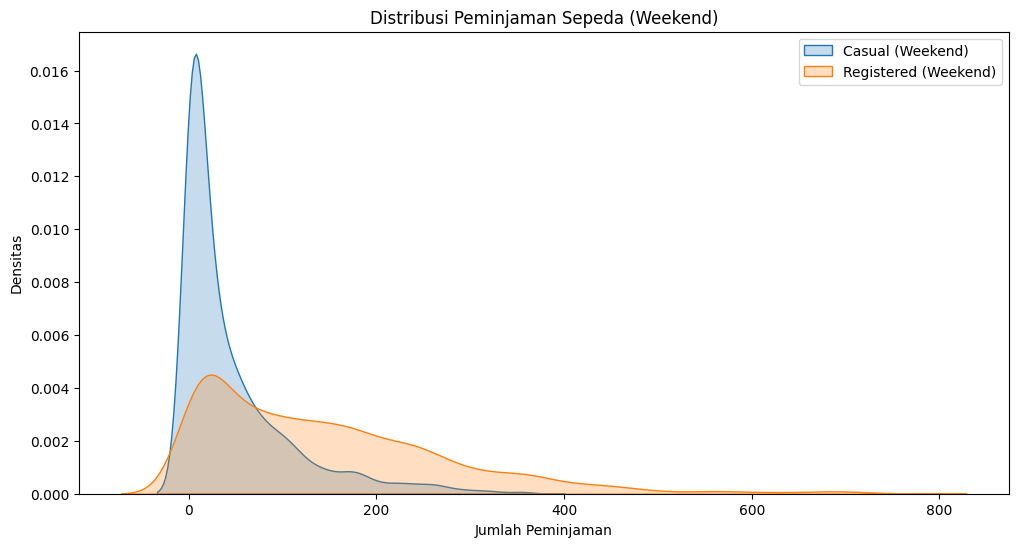

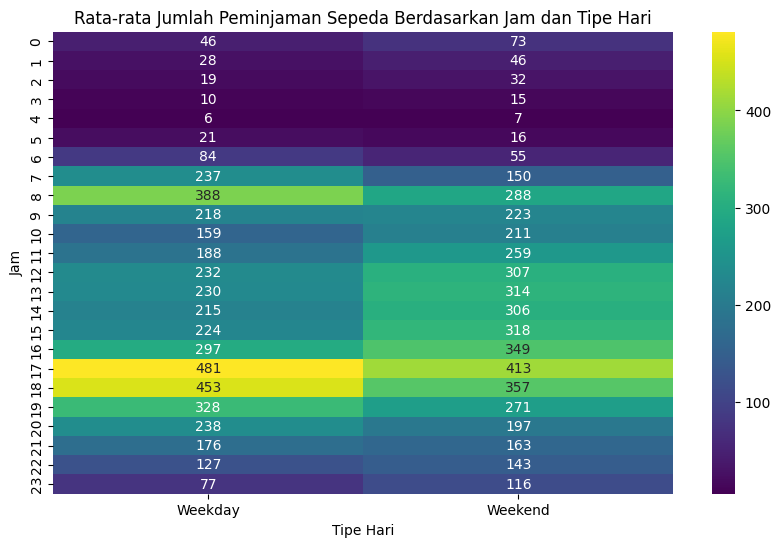

In [34]:
# 2. Perbedaan Pola Peminjaman antara Pengguna Casual dan Registered

plt.figure(figsize=(12,6))
sns.kdeplot(df_hour[df_hour['day_type'] == 'Weekday']['casual'], label='Casual (Weekday)', shade=True)
sns.kdeplot(df_hour[df_hour['day_type'] == 'Weekday']['registered'], label='Registered (Weekday)', shade=True)
plt.title('Distribusi Peminjaman Sepeda (Weekday)')
plt.xlabel('Jumlah Peminjaman')
plt.ylabel('Densitas')
plt.legend()
plt.show()


plt.figure(figsize=(12,6))
sns.kdeplot(df_hour[df_hour['day_type'] == 'Weekend']['casual'], label='Casual (Weekend)', shade=True)
sns.kdeplot(df_hour[df_hour['day_type'] == 'Weekend']['registered'], label='Registered (Weekend)', shade=True)
plt.title('Distribusi Peminjaman Sepeda (Weekend)')
plt.xlabel('Jumlah Peminjaman')
plt.ylabel('Densitas')
plt.legend()
plt.show()

# Visualisasi dengan heatmap untuk melihat korelasi antara jam, tipe hari dan jumlah peminjaman
plt.figure(figsize=(10,6))
heatmap_data = pd.pivot_table(df_hour, values='cnt', index='hr', columns='day_type', aggfunc='mean')
sns.heatmap(heatmap_data, annot=True, fmt=".0f", cmap='viridis')
plt.title('Rata-rata Jumlah Peminjaman Sepeda Berdasarkan Jam dan Tipe Hari')
plt.xlabel('Tipe Hari')
plt.ylabel('Jam')
plt.show()


**Insight:**
1.	Pengaruh Kecepatan Angin
-Terdapat korelasi negatif lemah antara kecepatan angin dan jumlah peminjaman sepeda, di mana peningkatan kecepatan angin cenderung menurunkan jumlah peminjaman. Namun, hubungan ini tidak terlalu kuat karena faktor lain juga berpengaruh. Regplot menunjukkan tren penurunan dengan penyebaran data yang cukup luas.
2.	Perbedaan Pola Peminjaman: Casual vs Registered
-Hari Kerja vs Akhir Pekan: Pengguna registered memiliki pola peminjaman yang lebih stabil dibandingkan pengguna casual, yang cenderung lebih fluktuatif dengan puncak di akhir pekan.
-Perbandingan Pengguna: Peminjaman oleh pengguna registered lebih tinggi dibandingkan casual di semua hari. Namun, pada akhir pekan, peminjaman oleh casual meningkat, mengindikasikan penggunaan untuk rekreasi. Visualisasi pointplot dan kdeplot mendukung perbedaan ini.
-Pengaruh Cuaca: Kondisi cuaca memengaruhi jumlah peminjaman, terutama pada akhir pekan, seperti terlihat dalam boxplot.
-Heatmap: Menegaskan perbedaan pola peminjaman berdasarkan jam dan hari, dengan jam sibuk yang berbeda antara hari kerja dan akhir pekan.



##**Menyimpan Hasil dari analisis Data ke file csv**

In [35]:
from google.colab import files

df_day.to_csv('df_day_analysis.csv', index=False)
files.download('df_day_analysis.csv')

df_hour.to_csv('df_hour_analysis.csv', index=False)
files.download('df_hour_analysis.csv')



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Conclusion

# Kesimpulan:

- Berdasarkan scatter plot, kecepatan angin menunjukkan sedikit pengaruh terhadap jumlah peminjaman sepeda.  Meskipun ada beberapa titik yang menunjukkan tren penurunan jumlah peminjaman pada kecepatan angin tinggi, hubungannya tidak begitu jelas dan perlu analisis lebih lanjut untuk memastikan korelasi yang signifikan.

- Grafik batang menunjukkan perbedaan pola peminjaman antara pengguna casual dan registered. Pengguna registered cenderung menyewa sepeda lebih banyak di hari kerja dibandingkan akhir pekan, sementara pengguna casual menunjukkan pola sebaliknya.  Hal ini mengindikasikan bahwa pengguna terdaftar kemungkinan menggunakan sepeda untuk komuter, sedangkan pengguna kasual menggunakannya untuk rekreasi atau aktivitas di akhir pekan.
